In [1]:
import pandas

In [3]:
import pandas as pd
df = pd.read_csv('weather.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


In [4]:
df.shape

(6, 4)

In [5]:
row, columns = df.shape
row

6

In [6]:
columns

4

In [7]:
df.head()

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain


In [8]:
df.tail(3)

,day,temperature,windspeed,event
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


In [9]:
df.loc[2]

day            1/3/2017
temperature          28
windspeed             2
event              Snow
Name: 2, dtype: object

In [10]:
df.sort_values(temerature)

NameError: name 'temerature' is not defined

In [11]:
df[2:5]

,day,temperature,windspeed,event
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain


In [12]:
df.sort_values('temerature')

KeyError: 'temerature'

In [13]:
df.columns


Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [14]:
df.day


0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [15]:
df['event'] #df.event is the same

0     Rain
1    Sunny
2     Snow
3     Snow
4     Rain
5    Sunny
Name: event, dtype: object

In [18]:
type(df['event'])

pandas.core.series.Series

In [20]:
df[['event','day']] #print columns

,event,day
0,Rain,1/1/2017
1,Sunny,1/2/2017
2,Snow,1/3/2017
3,Snow,1/4/2017
4,Rain,1/5/2017
5,Sunny,1/6/2017


In [25]:
df['temperature'].mean() #max, min, mean, std

30.5

In [26]:
df.describe() #statistics of the integer type of columns

,temperature,windspeed
count,6.000000,6.000000
mean,30.500000,4.666667
std,3.885872,2.338090
min,24.000000,2.000000
25%,29.000000,2.500000
50%,32.000000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


In [31]:
df[['day','temperature']][df.temperature==df.temperature.max()] #similar to the SQL 

,day,temperature
1,1/2/2017,35


In [35]:
df.set_index('day', inplace=True) #set index to the dates and overwrite the origintal df

In [36]:
df.loc['1/4/2017']

temperature      24
windspeed         7
event          Snow
Name: 1/4/2017, dtype: object

In [47]:
df.reset_index(inplace=True) #reset the index to original

In [48]:
df

,event,day,temperature,windspeed
0,Rain,1/1/2017,32,6
1,Sunny,1/2/2017,35,7
2,Snow,1/3/2017,28,2
3,Snow,1/4/2017,24,7
4,Rain,1/5/2017,32,4
5,Sunny,1/6/2017,32,2


In [49]:
df.set_index ('event', inplace=True)
df

,day,temperature,windspeed
event,,,
Rain,1/1/2017,32,6
Sunny,1/2/2017,35,7
Snow,1/3/2017,28,2
Snow,1/4/2017,24,7
Rain,1/5/2017,32,4
Sunny,1/6/2017,32,2


In [51]:
df.loc['Snow'] #almost the hash key

,day,temperature,windspeed
event,,,
Snow,1/3/2017,28,2
Snow,1/4/2017,24,7


In [52]:
import pandas as pd
df = pd.read_csv('weather.csv')
df

,day,city,temperature,windspeed,event
0,1/1/2017,Sydney,32,6,Rain
1,1/2/2017,Tokyo,35,7,Sunny
2,1/3/2017,DC,28,2,Snow
3,1/4/2017,Shanghai,24,7,Snow
4,1/5/2017,Reston,32,4,Rain
5,1/6/2017,Seattle,32,2,Sunny


In [55]:
g = df.groupby('event')

In [56]:
g

In [57]:
for event, event_df in g:
    print (event)
    print (event_df)

Rain
        day    city  temperature  windspeed event
0  1/1/2017  Sydney           32          6  Rain
4  1/5/2017  Reston           32          4  Rain
Snow
        day      city  temperature  windspeed event
2  1/3/2017        DC           28          2  Snow
3  1/4/2017  Shanghai           24          7  Snow
Sunny
        day     city  temperature  windspeed  event
1  1/2/2017    Tokyo           35          7  Sunny
5  1/6/2017  Seattle           32          2  Sunny


In [58]:
g.get_group ('Snow') #select * from table where event = snow, group by event

,day,city,temperature,windspeed,event
2,1/3/2017,DC,28,2,Snow
3,1/4/2017,Shanghai,24,7,Snow


In [61]:
g.mean() #group - apply - combine (into a single dataframe)

,temperature,windspeed
event,,
Rain,32.0,5.0
Snow,26.0,4.5
Sunny,33.5,4.5


In [66]:
g.describe()

temperature                                                 windspeed  \
            count  mean       std   min    25%   50%    75%   max     count   
event                                                                         
Rain          2.0  32.0  0.000000  32.0  32.00  32.0  32.00  32.0       2.0   
Snow          2.0  26.0  2.828427  24.0  25.00  26.0  27.00  28.0       2.0   
Sunny         2.0  33.5  2.121320  32.0  32.75  33.5  34.25  35.0       2.0   

                                                 
      mean       std  min   25%  50%   75%  max  
event                                            
Rain   5.0  1.414214  4.0  4.50  5.0  5.50  6.0  
Snow   4.5  3.535534  2.0  3.25  4.5  5.75  7.0  
Sunny  4.5  3.535534  2.0  3.25  4.5  5.75  7.0

event
Rain     AxesSubplot(0.125,0.125;0.775x0.755)
Snow     AxesSubplot(0.125,0.125;0.775x0.755)
Sunny    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

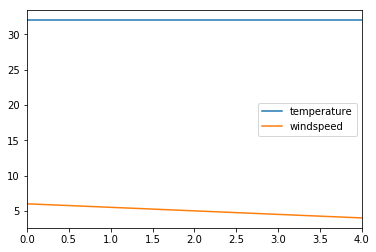

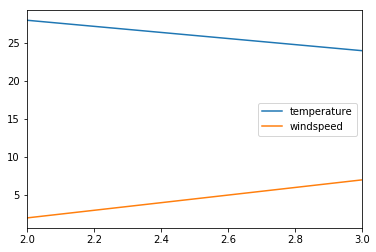

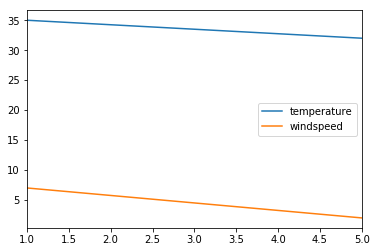

In [67]:
%matplotlib inline #plotting
g.plot()

In [70]:
import pandas as pd
india_weather = pd.DataFrame ({
    "city": ['mumbai','delhi','bangalore'],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,bangalore,30,78


In [71]:
us_weather = pd.DataFrame ({
    "city": ['new york','chicago','orlando'],
    "temperature": [35,23,15],
    "humidity": [82, 89, 56]
})
us_weather

,city,temperature,humidity
0,new york,35,82
1,chicago,23,89
2,orlando,15,56


In [78]:
#join two dataframes
df = pd.concat ([india_weather, us_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,bangalore,30,78
0,new york,35,82
1,chicago,23,89
2,orlando,15,56


In [86]:
#join two dataframes, removing previous index
df = pd.concat ([india_weather, us_weather], ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,bangalore,30,78
3,new york,35,82
4,chicago,23,89
5,orlando,15,56


In [88]:
#join two dataframes, creating addiitonal index as a subset, but have to remove the new index
df = pd.concat ([india_weather, us_weather], keys=['india','us'])
df

city  temperature  humidity
india 0     mumbai           32        80
      1      delhi           45        60
      2  bangalore           30        78
us    0   new york           35        82
      1    chicago           23        89
      2    orlando           15        56

In [90]:
df.loc['us']

,city,temperature,humidity
0,new york,35,82
1,chicago,23,89
2,orlando,15,56


In [91]:
#add a new column of event to df
e = pd.Series (["Rain", "Snow", "Dry", "Hot", "Cold", "Drizzle"], name = 'event')
e

0       Rain
1       Snow
2        Dry
3        Hot
4       Cold
5    Drizzle
Name: event, dtype: object

In [94]:
df = pd.concat ([india_weather, us_weather], ignore_index=True)
df2 = pd.concat ([df, e], axis =1)
df2

,city,temperature,humidity,event
0,mumbai,32,80,Rain
1,delhi,45,60,Snow
2,bangalore,30,78,Dry
3,new york,35,82,Hot
4,chicago,23,89,Cold
5,orlando,15,56,Drizzle
